target
0    50
1    50
2    50
Name: count, dtype: int64
(150, 4)
(150,)
[0 1 2]
Accuracy: 0.98
[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]


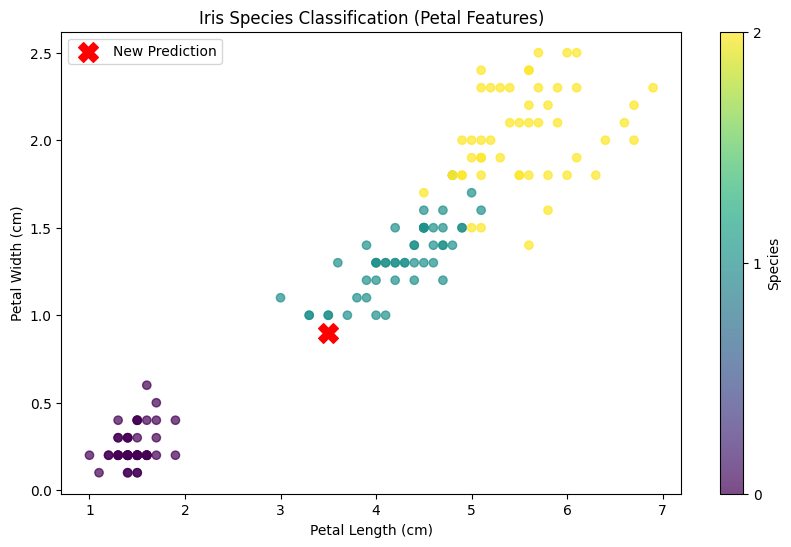

In [23]:
#Predictions taken place in code using Logistic Regression
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
#Importing the library and plot the scatter chart in the code and predicting the new point placement and working
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df['target'].value_counts())
df['target']=iris.target
X=df.drop('target',axis=1)
y=df['target']
print(X.shape)
print(y.shape)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['petal length (cm)'], df['petal width (cm)'],
            c=df['target'], cmap='viridis', alpha=0.7)
plt.scatter(3.5, 0.9, color='red', marker='X', s=200, label='New Prediction')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Species Classification (Petal Features)')
plt.legend()
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species')
plt.savefig('iris_scatter_plot.png')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
predictions = logreg.predict(X)
predicted_value = pd.DataFrame({
    "petal length (cm)":[3.5],
    "sepal length (cm)":[7.5],"petal width (cm)":[0.9],"sepal width (cm)":[2.5]
})
predicted_value = predicted_value[X.columns]
logreg.predict(predicted_value)
print(logreg.classes_)
logreg.predict_proba(predicted_value)
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)
cm = confusion_matrix(y, predictions)
print(cm)